In [5]:
pip install imblearn

In [5]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
from scipy import stats
import scipy.stats as stats
import matplotlib.patches as mpatches
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing
from sklearn import utils
import matplotlib.pyplot as plt
import imblearn
from imblearn.over_sampling import SMOTE

In [11]:
df = pd.read_csv("C:\\Users\\Nehanth\\Desktop\\DSP\\project\\archive\\paysim1.csv")
df.head()

,Unnamed: 0,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,0,1,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0
1,1,1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0
2,2,1,TRANSFER,181.00,181.0,0.00,0.0,0.0,1
3,3,1,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,1
4,4,1,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0


In [25]:
df = df.drop(columns = ['Unnamed: 0'])
df.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0
1,1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0
2,1,TRANSFER,181.00,181.0,0.00,0.0,0.0,1
3,1,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,1
4,1,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0


In [26]:
df['type'].value_counts()

CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64

In [27]:
df['newbalanceDest'].value_counts()

0.00           2439433
10000000.00         53
971418.91           32
19169204.93         29
16532032.16         25
                ...   
350033.41            1
302234.71            1
219824.01            1
808511.54            1
970408.13            1
Name: newbalanceDest, Length: 3555499, dtype: int64

In [28]:
df['isFraud'].value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

In [35]:
df.dtypes

step                int64
type               object
amount            float64
oldbalanceOrg     float64
newbalanceOrig    float64
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
dtype: object

In [39]:
dfInput = df.iloc[:,[0,2,3,4,5,6,]]
dfoutput = df.iloc[:,[-1]]

In [41]:
split = int (0.8*len(df))
X_train, X_test, Y_train, Y_test = dfInput[:split], dfInput[split:], dfoutput[:split], dfoutput[split:]
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(5090096, 6)
(5090096, 1)
(1272524, 6)
(1272524, 1)


In [42]:
model = LogisticRegression()
print(model)

LogisticRegression()


In [43]:
model = model.fit(X_train,Y_train)
ms = model.score(X_train,Y_train)
print("model score::",ms)

C:\Users\Nehanth\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


model score:: 0.9991762434343086


In [44]:
print("Confusion Matrix")
predicted = model.predict(X_test)
print(metrics.confusion_matrix(Y_test, predicted))

Confusion Matrix
[[1268270       0]
 [   3420     834]]


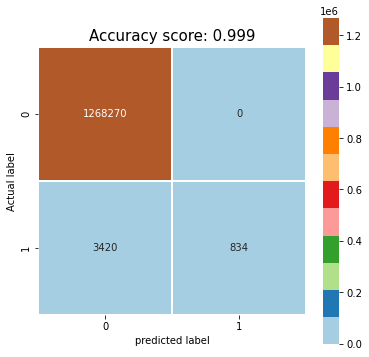

In [59]:
cm = metrics.confusion_matrix(Y_test, predicted)
plt.figure(figsize= (6,6))
sns.heatmap(cm, annot=True, fmt = ".0f", linewidths=.8, square = True, cmap = 'Paired');
plt.ylabel('Actual label');
plt.xlabel('predicted label')

all_sample_title = 'Accuracy score: {:0.3f}'.format(ms)
plt.title(all_sample_title, size =15);


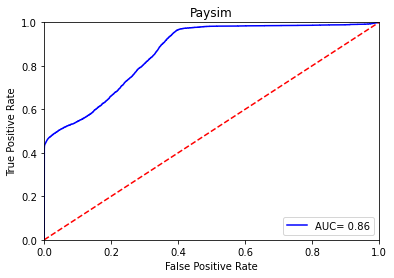

In [63]:
probs = model.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(Y_test, preds)
roc_auc = metrics.auc (fpr,tpr)

plt.title('Paysim')
plt.plot(fpr, tpr, 'b',label = 'AUC= %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0,1],[0,1], 'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [64]:
print(metrics.classification_report(Y_test, predicted))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1268270
           1       1.00      0.20      0.33      4254

    accuracy                           1.00   1272524
   macro avg       1.00      0.60      0.66   1272524
weighted avg       1.00      1.00      1.00   1272524



In [66]:
warnings.filterwarnings("ignore")
cross_val = cross_val_score(LogisticRegression(), X_test,Y_test, scoring = 'accuracy', cv=10)
print(cross_val)

[0.99824759 0.99802755 0.99814543 0.99838904 0.99782322 0.99783893
 0.99806683 0.99798824 0.99830258 0.99810612]
